In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from osgeo import gdal
import xarray as xr
from scipy.io import loadmat
import scipy.stats as stats
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'Arial' # Choose a nice font here
plt.rcParams['font.size'] = 11 # standard font size
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['mathtext.it'] = 'Arial'
plt.rcParams['figure.facecolor'] = 'white' # make sure background isn't transparent
plt.rcParams['figure.dpi'] = 150
# https://www.nature.com/documents/Final_guide_to_authors.pdf

In [3]:
def get_r2(x,y):
    polyfit = np.polyfit(x,y,1)
    y_predicted = np.polyval(polyfit,x)
    residuals = y-y_predicted
    return 1-np.sum(residuals**2)/np.sum((y-np.mean(y))**2)

def get_percentiles(x):
    y_percentiles = np.arange(101)
    x_percentiles = [np.percentile(x,y_percentiles[i]) for i in range(len(y_percentiles))]
    return x_percentiles,y_percentiles

def get_realpdf(x,y,nbins):
    polyfit = np.polyfit(x,y,1)
    y_predicted = np.polyval(polyfit,x)
    residuals = y-y_predicted    
    bins    = np.linspace(-np.max(np.abs(residuals)),np.max(np.abs(residuals)),nbins)
    binmids = bins[1:] - np.diff(bins)/2
    bindensity,_ = np.histogram(residuals,bins=bins,density=True)
    return bindensity,binmids,bins

def get_normalpdf(x,y,binmids):
    polyfit = np.polyfit(x,y,1)
    y_predicted = np.polyval(polyfit,x)
    residuals = y-y_predicted
    mean = np.mean(residuals)
    std = np.std(residuals)
    return stats.norm.pdf(binmids,mean,std)

def get_powerlaw_constants(x,y):
    polyfit = np.polyfit(np.log10(x),np.log10(y),1)
    l,n = 10**polyfit[1],polyfit[0]
    return l,n

In [ ]:
#Read Data

In [4]:
data = pd.read_csv('Marshy Creek Data.csv')
dist = data['Distance from estuary mouth']
depth = data['AVERAGE depth']
orgc = data['Organic C (%)']
tn = data['Total N (%)']

In [5]:
means = data.groupby(['Site']).mean()
means = means.sort_values(['Distance from estuary mouth'])
dist0 = means['Distance from estuary mouth']
depth0 = means['AVERAGE depth']
orgc0 = means['Organic C (%)']
tn0 = means['Total N (%)']

In [6]:
sds = data.groupby(['Site']).std()
sds = sds.sort_values(['Order'])
dist_sd = sds['Distance from estuary mouth']
depth_sd = sds['AVERAGE depth']
orgc_sd = sds['Organic C (%)']
tn_sd = sds['Total N (%)']

In [ ]:
#Plots

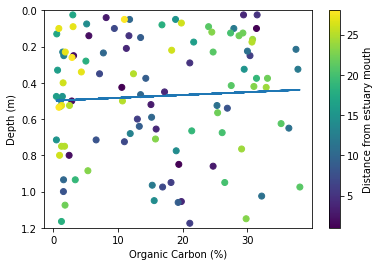

In [17]:
orgdepth = stats.linregress(orgc,depth)
plt.plot(orgc,orgdepth.slope*orgc+orgdepth.intercept)
plt.scatter(np.flip(orgc), np.flip(depth), c=dist)
plt.ylim(1.2,0)
plt.xlabel('Organic Carbon (%)')
plt.ylabel('Depth (m)')
plt.colorbar(label='Distance from estuary mouth')

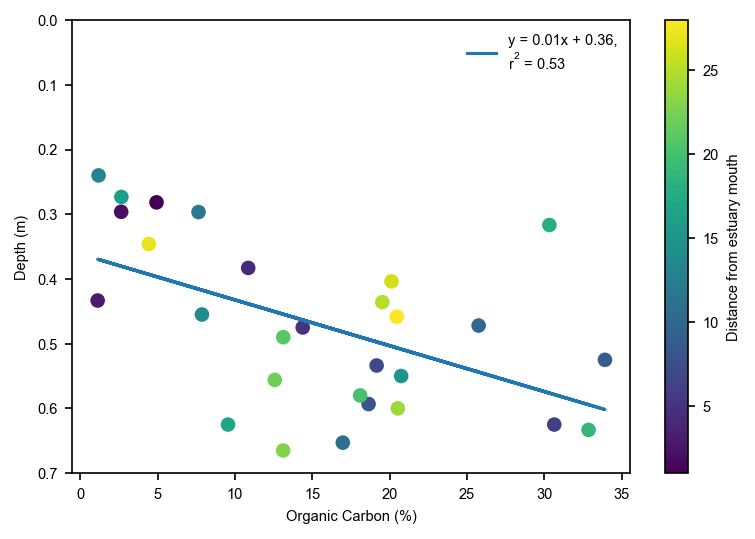

In [32]:
m, c, r_value, p_value, std_err = stats.linregress(orgc0,depth0)
orgdepth2 = stats.linregress(orgc0,depth0)

plt.plot(orgc0,orgdepth2.slope*orgc0+orgdepth2.intercept, label= 'y = %.2fx + %.2f,\nr$^{2}$ = %.2f'%(m, c, r_value))
plt.scatter(orgc0, depth0, c=dist0)
plt.ylim(0.7,0)
plt.xlabel('Organic Carbon (%)')
plt.ylabel('Depth (m)')
plt.colorbar(label='Distance from estuary mouth')
#plt.errorbar(orgc0, depth0, yerr = (depth_sd, orgc_sd),fmt ='o')
plt.legend(frameon = False)

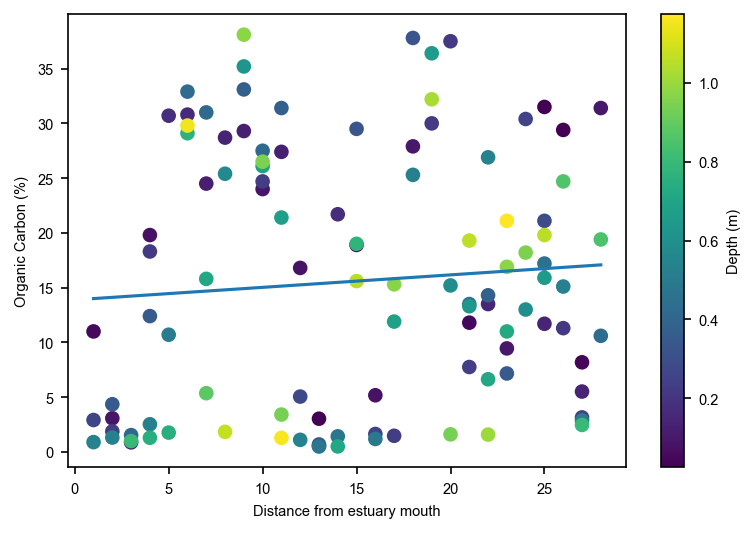

In [33]:
xtest = stats.linregress(dist,orgc)
plt.plot(dist,xtest.slope*dist+xtest.intercept)
plt.scatter(dist, orgc, c=depth)
plt.xlabel('Distance from estuary mouth')
plt.ylabel('Organic Carbon (%)')
plt.colorbar(label='Depth (m)')

In [ ]:
#Second Edition of Data Reading

In [7]:
group1 = pd.read_csv('MC Data Group1.csv')
updat = group1.groupby(['Site']).mean()
updat = updat.sort_values(['Distance from estuary mouth'])

dist1 = updat['Distance from estuary mouth']
depth1 = updat['AVERAGE depth']
orgc1 = updat['Organic C (%)']
tn1 = updat['Total N (%)']

group2 = pd.read_csv('MC Data Group2.csv')
updat2 = group2.groupby(['Site']).mean()
updat2 = updat2.sort_values(['Distance from estuary mouth'])

dist2 = updat2['Distance from estuary mouth']
depth2 = updat2['AVERAGE depth']
orgc2 = updat2['Organic C (%)']
tn2 = updat2['Total N (%)']

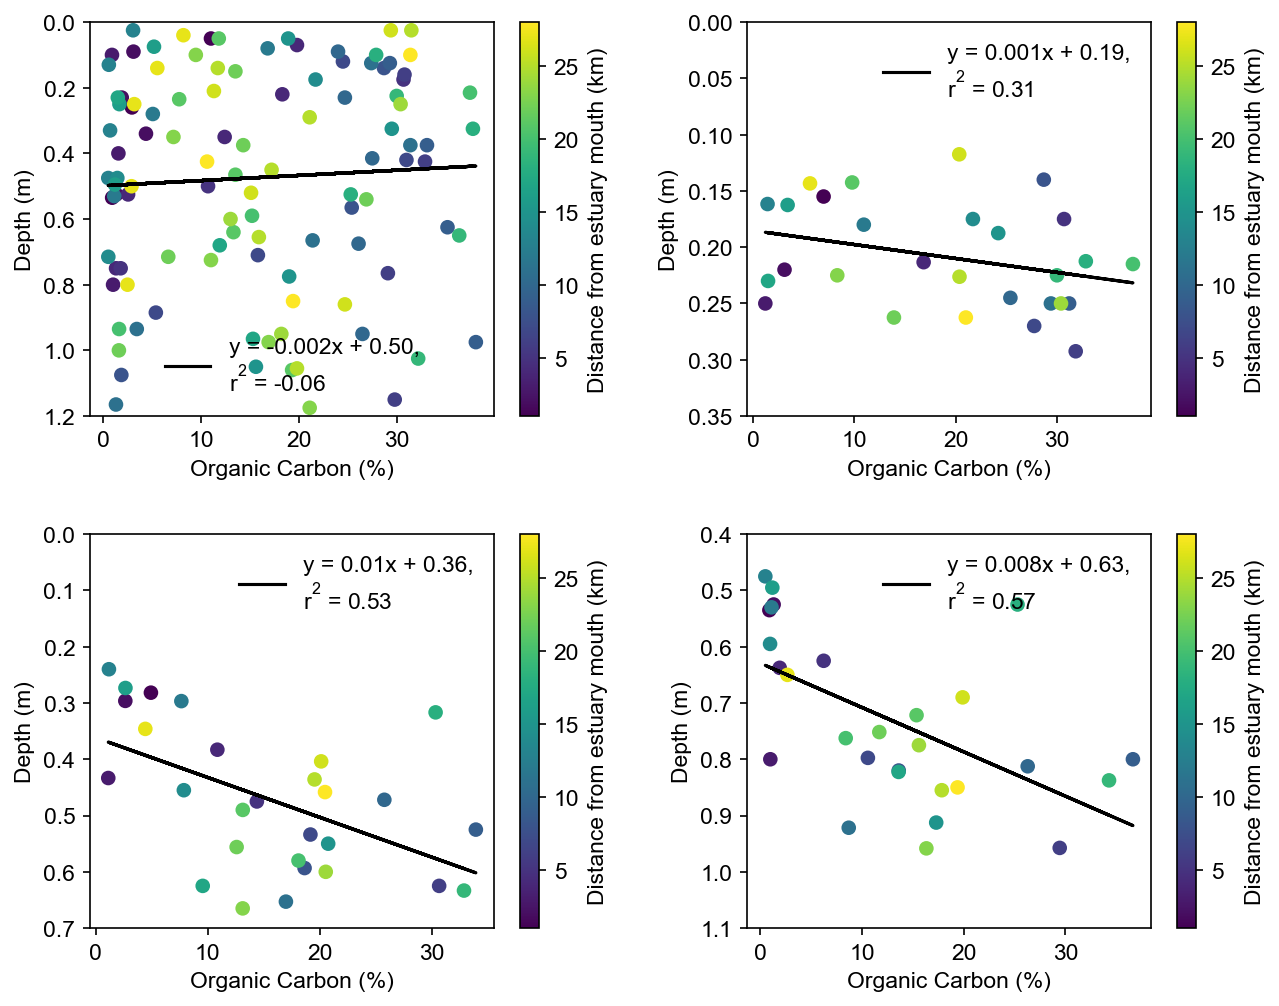

In [13]:
m2, c2, r_value2, p_value, std_err = stats.linregress(orgc1,depth1)
apple = stats.linregress(orgc1,depth1)

fig = plt.gcf()

plt.subplot(224)
plt.plot(orgc1,apple.slope*orgc1+apple.intercept, c='k', label= 'y = %.3fx + %.2f,\nr$^{2}$ = %.2f'%(m2, c2, r_value2))
plt.scatter(orgc1, depth1, c=dist1)
plt.xlabel('Organic Carbon (%)')
plt.ylabel('Depth (m)')
plt.colorbar(label='Distance from estuary mouth (km)')
plt.ylim(1.1,0.40)
plt.legend(frameon = False)

m3, c3, r_value3, p_value, std_err = stats.linregress(orgc2,depth2)
pear = stats.linregress(orgc2,depth2)
plt.subplot(222)
plt.plot(orgc2,pear.slope*orgc2+pear.intercept, c='k', label= 'y = %.3fx + %.2f,\nr$^{2}$ = %.2f'%(m3, c3, r_value3))
plt.scatter(orgc2, depth2, c=dist2)
plt.xlabel('Organic Carbon (%)')
plt.ylabel('Depth (m)')
plt.colorbar(label='Distance from estuary mouth (km)')
plt.ylim(0.35,0)
plt.legend(frameon = False)

m4, c4, r_value4, p_value, std_err = stats.linregress(orgc,depth)
banana = stats.linregress(orgc,depth)
plt.subplot(221)
plt.plot(orgc,banana.slope*orgc+banana.intercept, c='k', label= 'y = %.3fx + %.2f,\nr$^{2}$ = %.2f'%(m4, c4, r_value4))
plt.scatter(orgc, depth, c=dist)
plt.xlabel('Organic Carbon (%)')
plt.ylabel('Depth (m)')
plt.colorbar(label = 'Distance from estuary mouth (km)')
plt.ylim(1.2,0)
plt.legend(frameon = False)

m, c, r_value, p_value, std_err = stats.linregress(orgc0,depth0)
orgdepth2 = stats.linregress(orgc0,depth0)
plt.subplot(223)
plt.plot(orgc0,orgdepth2.slope*orgc0+orgdepth2.intercept, c='k', label= 'y = %.2fx + %.2f,\nr$^{2}$ = %.2f'%(m, c, r_value))
plt.scatter(orgc0, depth0, c=dist0)
plt.ylim(0.7,0)
plt.xlabel('Organic Carbon (%)')
plt.ylabel('Depth (m)')
plt.colorbar(label = 'Distance from estuary mouth (km)')
#plt.errorbar(orgc0, depth0, yerr = (depth_sd, orgc_sd),fmt ='o')
plt.legend(frameon = False)

plt.subplots_adjust(hspace=0.3,wspace=0.3)
fig.set_size_inches(10,8)
plt.savefig("figuretest.png", dpi = 300)

In [78]:
orgdepth = stats.linregress(orgc1,depth1)
orgdepth

LinregressResult(slope=0.00361838151818071, intercept=0.7095880708516958, rvalue=0.19099677581104943, pvalue=0.1749907887907634, stderr=0.002629866708497456, intercept_stderr=0.04653874627254807)

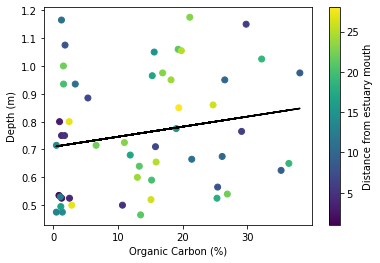

In [89]:
orgdepth = stats.linregress(orgc1,depth1)
plt.plot(orgc1,orgdepth.slope*orgc1+orgdepth.intercept, c='k', label= '%.r_2$')
plt.scatter(orgc1, depth1, c=dist1)
plt.xlabel('Organic Carbon (%)')
plt.ylabel('Depth (m)')
plt.colorbar(label='Distance from estuary mouth')

In [ ]:
ndepth = stats.linregress(orgc1,depth1)
plt.plot(orgc1,orgdepth.slope*orgc1+orgdepth.intercept, c='k', label= '%.r_2$')
plt.scatter(orgc1, depth1, c=dist1)
plt.xlabel('Organic Carbon (%)')
plt.ylabel('Depth (m)')
plt.colorbar(label='Distance from estuary mouth')